## ACA3 

In [41]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

Fristly, we need to upload the data. 

In [42]:
Score_card = pd.read_csv("CollegeScorecard3.csv")

/Users/mark/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [43]:
Score_card

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7800,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7801,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7802,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871


### Data filtering: 

In the data filtering process, we want to keep as much variables as we can. Our goal is to remove all the values with nah and string. However, if we remove nah value directly, a lot of data will be removed. Thus, we set Admission rates as fixed variables that we think the most important and related to our task. We make sure there is no nan in those attributes. 

In [44]:
new_score_card = Score_card.dropna(subset=['ADM_RATE','ADM_RATE_ALL'])

In [45]:
new_score_card1 = new_score_card.dropna(axis= "columns")
new_score_card1

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,HCM2,main,NUMBRANCH,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,0,1,1,...,0.9501,0.0089,0.0022,0.0012,0.0010,0.0000,0.0002,0.0084,0.0622,1
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0,1,1,...,0.2590,0.0258,0.0518,0.0026,0.0007,0.0344,0.0140,0.0130,0.2579,1
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,0,1,1,...,0.1310,0.0338,0.0364,0.0145,0.0002,0.0161,0.0329,0.0338,0.2395,1
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,0,1,1,...,0.9285,0.0114,0.0015,0.0009,0.0007,0.0064,0.0207,0.0138,0.0902,1
5,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,35487-0166,0,1,1,...,0.1140,0.0313,0.0112,0.0044,0.0011,0.0210,0.0278,0.0028,0.0852,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,482653,1072725,10727,DeVry University-Virginia,Arlington,VA,22202,0,0,26,...,0.4151,0.1111,0.0255,0.0102,0.0038,0.0128,0.0255,0.1596,0.4840,1
7368,482662,1072723,10727,DeVry University-Washington,Federal Way,WA,98001,0,0,26,...,0.0966,0.0579,0.0579,0.0107,0.0258,0.0193,0.0021,0.1803,0.4914,1
7369,482671,1072739,10727,DeVry University-Wisconsin,Milwaukee,WI,53202,0,0,26,...,0.3041,0.0811,0.0203,0.0068,0.0068,0.0068,0.0135,0.0473,0.6149,1
7370,482680,158500,1585,University of North Georgia,Dahlonega,GA,30597,0,1,1,...,0.0449,0.0859,0.0283,0.0023,0.0012,0.0239,0.0119,0.0114,0.3144,1


Now, we need to remove the string value "PrivacySupressed" because the string value will prevent the later standardization process. 

In [46]:
new_score_card2 = new_score_card1.drop(new_score_card1.columns[new_score_card1.columns.str.match(r'PrivacySupressed')], axis=1)

In [47]:
new_score_card2

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,HCM2,main,NUMBRANCH,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,0,1,1,...,0.9501,0.0089,0.0022,0.0012,0.0010,0.0000,0.0002,0.0084,0.0622,1
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,0,1,1,...,0.2590,0.0258,0.0518,0.0026,0.0007,0.0344,0.0140,0.0130,0.2579,1
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,0,1,1,...,0.1310,0.0338,0.0364,0.0145,0.0002,0.0161,0.0329,0.0338,0.2395,1
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,0,1,1,...,0.9285,0.0114,0.0015,0.0009,0.0007,0.0064,0.0207,0.0138,0.0902,1
5,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,35487-0166,0,1,1,...,0.1140,0.0313,0.0112,0.0044,0.0011,0.0210,0.0278,0.0028,0.0852,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,482653,1072725,10727,DeVry University-Virginia,Arlington,VA,22202,0,0,26,...,0.4151,0.1111,0.0255,0.0102,0.0038,0.0128,0.0255,0.1596,0.4840,1
7368,482662,1072723,10727,DeVry University-Washington,Federal Way,WA,98001,0,0,26,...,0.0966,0.0579,0.0579,0.0107,0.0258,0.0193,0.0021,0.1803,0.4914,1
7369,482671,1072739,10727,DeVry University-Wisconsin,Milwaukee,WI,53202,0,0,26,...,0.3041,0.0811,0.0203,0.0068,0.0068,0.0068,0.0135,0.0473,0.6149,1
7370,482680,158500,1585,University of North Georgia,Dahlonega,GA,30597,0,1,1,...,0.0449,0.0859,0.0283,0.0023,0.0012,0.0239,0.0119,0.0114,0.3144,1


Now, there are other attributes that contains string only, we need to remove them too.

In [48]:
from scipy import stats
%matplotlib notebook

In [49]:
new_score_card3 = new_score_card2.drop(['INSTNM','CITY','STABBR','ZIP'], axis=1)
new_score_card3

,UNITID,OPEID,opeid6,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER
0,100654,100200,1002,0,1,1,3,4,1,1,...,0.9501,0.0089,0.0022,0.0012,0.0010,0.0000,0.0002,0.0084,0.0622,1
1,100663,105200,1052,0,1,1,3,4,1,1,...,0.2590,0.0258,0.0518,0.0026,0.0007,0.0344,0.0140,0.0130,0.2579,1
3,100706,105500,1055,0,1,1,3,4,1,1,...,0.1310,0.0338,0.0364,0.0145,0.0002,0.0161,0.0329,0.0338,0.2395,1
4,100724,100500,1005,0,1,1,3,4,1,1,...,0.9285,0.0114,0.0015,0.0009,0.0007,0.0064,0.0207,0.0138,0.0902,1
5,100751,105100,1051,0,1,1,3,4,1,1,...,0.1140,0.0313,0.0112,0.0044,0.0011,0.0210,0.0278,0.0028,0.0852,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,482653,1072725,10727,0,0,26,3,4,3,51,...,0.4151,0.1111,0.0255,0.0102,0.0038,0.0128,0.0255,0.1596,0.4840,1
7368,482662,1072723,10727,0,0,26,3,4,3,53,...,0.0966,0.0579,0.0579,0.0107,0.0258,0.0193,0.0021,0.1803,0.4914,1
7369,482671,1072739,10727,0,0,26,3,4,3,55,...,0.3041,0.0811,0.0203,0.0068,0.0068,0.0068,0.0135,0.0473,0.6149,1
7370,482680,158500,1585,0,1,1,3,4,1,13,...,0.0449,0.0859,0.0283,0.0023,0.0012,0.0239,0.0119,0.0114,0.3144,1


We will standardize the dataset, before the standardization, we need to normalize the data.

In [50]:
normal_score_card= np.log(new_score_card3.iloc[:,1:]) #The algorithm of clustering in the later part will 
#treat each row as a value belonging to a UNTID, we can remove it for now 
#because we are going to removie it anyway.
normal_score_card

,OPEID,opeid6,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER
0,11.514923,6.909753,-inf,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-0.051188,-4.721704,-6.119298,-6.725434,-6.907755,-inf,-8.517193,-4.779524,-2.777400,0.0
1,11.563619,6.958448,-inf,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-1.350927,-3.657381,-2.960365,-5.952244,-7.264430,-3.369699,-4.268698,-4.342806,-1.355183,0.0
3,11.566466,6.961296,-inf,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-2.032558,-3.387294,-3.313187,-4.233607,-8.517193,-4.128936,-3.414283,-3.387294,-1.429202,0.0
4,11.517913,6.912743,-inf,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-0.074185,-4.474142,-6.502290,-7.013116,-7.264430,-5.051457,-3.877622,-4.283087,-2.405726,0.0
5,11.562668,6.957497,-inf,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-2.171557,-3.464137,-4.491842,-5.426151,-6.812445,-3.863233,-3.582719,-5.878136,-2.462754,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,13.885713,9.280519,-inf,-inf,3.258097,1.098612,1.386294,1.098612,3.931826,1.609438,...,-0.879236,-2.197325,-3.669077,-4.585368,-5.572754,-4.358310,-3.669077,-1.835085,-0.725670,0.0
7368,13.885711,9.280519,-inf,-inf,3.258097,1.098612,1.386294,1.098612,3.970292,2.079442,...,-2.337177,-2.849038,-2.849038,-4.537512,-3.657381,-3.947650,-6.165818,-1.713133,-0.710497,0.0
7369,13.885726,9.280519,-inf,-inf,3.258097,1.098612,1.386294,1.098612,4.007333,1.098612,...,-1.190399,-2.512072,-3.897134,-4.990833,-4.990833,-4.990833,-4.305066,-3.051245,-0.486296,0.0
7370,11.973510,7.368340,-inf,0.0,0.000000,1.098612,1.386294,0.000000,2.564949,1.609438,...,-3.103317,-2.454571,-3.564893,-6.074846,-6.725434,-3.733877,-4.431217,-4.474142,-1.157089,0.0


The table above is normalized. However, there are value negative or positive infinities. Standardization will not take nan and negative or positive infinities. Thus we drop the values with positive and negative infinities.

In [51]:
normal_score_card2 = normal_score_card.replace([np.inf, -np.inf], np.nan)
normal_score_card2

,OPEID,opeid6,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER
0,11.514923,6.909753,NaN,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-0.051188,-4.721704,-6.119298,-6.725434,-6.907755,NaN,-8.517193,-4.779524,-2.777400,0.0
1,11.563619,6.958448,NaN,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-1.350927,-3.657381,-2.960365,-5.952244,-7.264430,-3.369699,-4.268698,-4.342806,-1.355183,0.0
3,11.566466,6.961296,NaN,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-2.032558,-3.387294,-3.313187,-4.233607,-8.517193,-4.128936,-3.414283,-3.387294,-1.429202,0.0
4,11.517913,6.912743,NaN,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-0.074185,-4.474142,-6.502290,-7.013116,-7.264430,-5.051457,-3.877622,-4.283087,-2.405726,0.0
5,11.562668,6.957497,NaN,0.0,0.000000,1.098612,1.386294,0.000000,0.000000,1.609438,...,-2.171557,-3.464137,-4.491842,-5.426151,-6.812445,-3.863233,-3.582719,-5.878136,-2.462754,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7367,13.885713,9.280519,NaN,NaN,3.258097,1.098612,1.386294,1.098612,3.931826,1.609438,...,-0.879236,-2.197325,-3.669077,-4.585368,-5.572754,-4.358310,-3.669077,-1.835085,-0.725670,0.0
7368,13.885711,9.280519,NaN,NaN,3.258097,1.098612,1.386294,1.098612,3.970292,2.079442,...,-2.337177,-2.849038,-2.849038,-4.537512,-3.657381,-3.947650,-6.165818,-1.713133,-0.710497,0.0
7369,13.885726,9.280519,NaN,NaN,3.258097,1.098612,1.386294,1.098612,4.007333,1.098612,...,-1.190399,-2.512072,-3.897134,-4.990833,-4.990833,-4.990833,-4.305066,-3.051245,-0.486296,0.0
7370,11.973510,7.368340,NaN,0.0,0.000000,1.098612,1.386294,0.000000,2.564949,1.609438,...,-3.103317,-2.454571,-3.564893,-6.074846,-6.725434,-3.733877,-4.431217,-4.474142,-1.157089,0.0


We standardize the table to unify the scale of each attributes. 

In [52]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(normal_score_card2)
a = scaler.transform(normal_score_card2)

/Users/mark/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:763: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/mark/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:704: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [53]:
# Here is how to standardize the data, and with a return of dataframe.
score_card_scaled = pd.DataFrame(scaler.fit_transform(normal_score_card2),columns = normal_score_card2.columns)
score_card_scaled
# Now our values are in the same scale

/Users/mark/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:763: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/mark/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:704: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


,OPEID,opeid6,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER
0,-1.443819,-1.542316,NaN,0.0,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,...,2.110934,-1.836073,-1.966242,-1.208509,-0.585354,NaN,-3.706881,-1.020983,-0.332041,0.0
1,-1.399321,-1.492733,NaN,0.0,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,...,0.967961,-0.858934,0.743722,-0.459512,-0.887985,0.501820,-0.337188,-0.667170,0.752041,0.0
2,-1.396719,-1.489833,NaN,0.0,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,...,0.368544,-0.610972,0.441046,1.205349,-1.950924,-0.438492,0.340492,0.106952,0.695621,0.0
3,-1.441087,-1.539272,NaN,0.0,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,...,2.090710,-1.608790,-2.294800,-1.487190,-0.887985,-1.581030,-0.027006,-0.618787,-0.048733,0.0
4,-1.400190,-1.493701,NaN,0.0,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,...,0.246311,-0.681521,-0.570090,0.050120,-0.504486,-0.109420,0.206896,-1.911040,-0.092202,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,0.722627,0.871656,NaN,NaN,2.013799,0.505403,0.584422,1.362135,0.930168,0.557056,...,1.382760,0.481521,0.135737,0.864595,0.547363,-0.722570,0.138402,1.364499,1.231887,0.0
2216,0.722625,0.871656,NaN,NaN,2.013799,0.505403,0.584422,1.362135,0.979566,1.347748,...,0.100667,-0.116807,0.839227,0.910954,2.172512,-0.213970,-1.841888,1.463300,1.243453,0.0
2217,0.722638,0.871656,NaN,NaN,2.013799,0.505403,0.584422,1.362135,1.027134,-0.302312,...,1.109128,0.192556,-0.059907,0.471817,1.041109,-1.505946,-0.366033,0.379208,1.414349,0.0
2218,-1.024759,-1.075372,NaN,0.0,-0.419385,0.505403,0.584422,-1.458070,-0.825171,0.557056,...,-0.573067,0.245346,0.225113,-0.578278,-0.430659,0.050787,-0.466090,-0.773573,0.903038,0.0


We can not drop nan from columns or rows directly because it will remove too much data. We want to keep the data as more as possible, so we need to set a limit to remove nan. (Example, we need to delete the columns that contain many nans, then we filter non-nan values detailly. 

In [54]:
limitPer = len(score_card_scaled) * .8
score_card_scaled1 = score_card_scaled.dropna(thresh=limitPer, axis=1)
score_card_scaled1

,OPEID,opeid6,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,ADM_RATE,...,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_2MOR,UGDS_UNKN,PPTUG_EF,CURROPER
0,-1.443819,-1.542316,0.0,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,0.837797,...,0.713863,-2.908635,2.110934,-1.836073,-1.966242,-1.208509,NaN,-1.020983,-0.332041,0.0
1,-1.399321,-1.492733,0.0,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,0.749081,...,1.345046,0.234588,0.967961,-0.858934,0.743722,-0.459512,0.501820,-0.667170,0.752041,0.0
2,-1.396719,-1.489833,0.0,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,0.567983,...,0.906467,0.396594,0.368544,-0.610972,0.441046,1.205349,-0.438492,0.106952,0.695621,0.0
3,-1.441087,-1.539272,0.0,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,-0.555081,...,0.886954,-3.472266,2.090710,-1.608790,-2.294800,-1.487190,-1.581030,-0.618787,-0.048733,0.0
4,-1.400190,-1.493701,0.0,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,-0.311124,...,1.928907,0.514280,0.246311,-0.681521,-0.570090,0.050120,-0.109420,-1.911040,-0.092202,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,0.722627,0.871656,NaN,2.013799,0.505403,0.584422,1.362135,0.930168,0.557056,0.533926,...,-0.306251,-0.718444,1.382760,0.481521,0.135737,0.864595,-0.722570,1.364499,1.231887,0.0
2216,0.722625,0.871656,NaN,2.013799,0.505403,0.584422,1.362135,0.979566,1.347748,0.479080,...,-0.628342,0.146494,0.100667,-0.116807,0.839227,0.910954,-0.213970,1.463300,1.243453,0.0
2217,0.722638,0.871656,NaN,2.013799,0.505403,0.584422,1.362135,1.027134,-0.302312,-0.852815,...,-1.340227,0.077218,1.109128,0.192556,-0.059907,0.471817,-1.505946,0.379208,1.414349,0.0
2218,-1.024759,-1.075372,0.0,-0.419385,0.505403,0.584422,-1.458070,-0.825171,0.557056,-0.122530,...,1.505409,0.518961,-0.573067,0.245346,0.225113,-0.578278,0.050787,-0.773573,0.903038,0.0


Clealy, "main" column contains many nans, if we want to drop nans row by row, too much information will be removed. Thus we decide to remove "main" column because we think that main would not be a factor that could be influential to our task. 

In [55]:
score_card_scaled2 = score_card_scaled1.drop('main',1)
score_card_scaled3 = score_card_scaled2.dropna(axis= "rows")

In [56]:
score_card_scaled3

,OPEID,opeid6,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,ADM_RATE,ADM_RATE_ALL,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_2MOR,UGDS_UNKN,PPTUG_EF,CURROPER
1,-1.399321,-1.492733,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,0.749081,0.771349,1.345046,0.234588,0.967961,-0.858934,0.743722,-0.459512,0.501820,-0.667170,0.752041,0.0
2,-1.396719,-1.489833,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,0.567983,0.586481,0.906467,0.396594,0.368544,-0.610972,0.441046,1.205349,-0.438492,0.106952,0.695621,0.0
3,-1.441087,-1.539272,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,-0.555081,-0.559964,0.886954,-3.472266,2.090710,-1.608790,-2.294800,-1.487190,-1.581030,-0.618787,-0.048733,0.0
4,-1.400190,-1.493701,-0.419385,0.505403,0.584422,-1.458070,-4.119071,0.557056,-0.311124,-0.310927,1.928907,0.514280,0.246311,-0.681521,-0.570090,0.050120,-0.109420,-1.911040,-0.092202,0.0
7,-1.434744,-1.532204,-0.419385,0.505403,-0.155792,0.321281,-4.119071,0.557056,0.004179,0.010939,-0.051168,0.544841,0.076674,-0.705291,0.500233,0.864595,-1.368194,-1.011395,-1.592659,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,0.722627,0.871656,2.013799,0.505403,0.584422,1.362135,0.930168,0.557056,0.533926,0.453073,-0.306251,-0.718444,1.382760,0.481521,0.135737,0.864595,-0.722570,1.364499,1.231887,0.0
2216,0.722625,0.871656,2.013799,0.505403,0.584422,1.362135,0.979566,1.347748,0.479080,0.453073,-0.628342,0.146494,0.100667,-0.116807,0.839227,0.910954,-0.213970,1.463300,1.243453,0.0
2217,0.722638,0.871656,2.013799,0.505403,0.584422,1.362135,1.027134,-0.302312,-0.852815,0.453073,-1.340227,0.077218,1.109128,0.192556,-0.059907,0.471817,-1.505946,0.379208,1.414349,0.0
2218,-1.024759,-1.075372,-0.419385,0.505403,0.584422,-1.458070,-0.825171,0.557056,-0.122530,-0.118408,1.505409,0.518961,-0.573067,0.245346,0.225113,-0.578278,0.050787,-0.773573,0.903038,0.0


### PCA: Scree plot

to determine how many dimensions is best. 

Now, our data is standardized. We can do PCA now. To see which components are influential, we decide to do a scree plot to determine the number of components we want to take in PCA. 

In [57]:
pca = PCA()

pca.fit(score_card_scaled3)

PCA()

In [58]:
pca.explained_variance_ratio_

array([0.21145735, 0.12632187, 0.11401067, 0.08119836, 0.07814433,
       0.0701871 , 0.05910204, 0.04678688, 0.04007572, 0.03748984,
       0.03034546, 0.02854984, 0.02363901, 0.01823988, 0.01427397,
       0.01177787, 0.00382817, 0.00345723, 0.00111443, 0.        ])

Here is scree plot. 

<IPython.core.display.Javascript object>


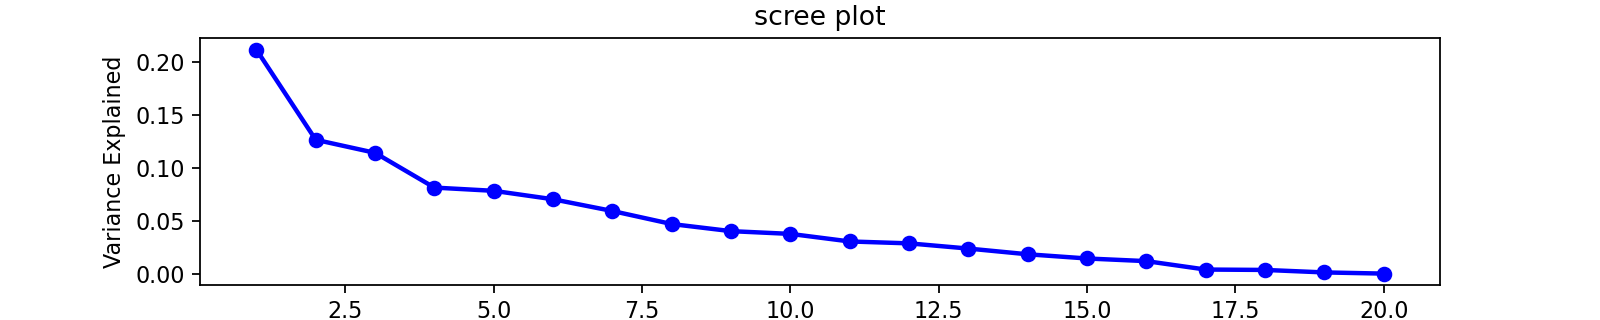

None


In [59]:
plt.figure(figsize = (10,2))
plt.plot(range(1,21), pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('scree plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
print(plt.show())




We also set a cumulative variance figure to see how many components we need to consider in PCA.  

<IPython.core.display.Javascript object>


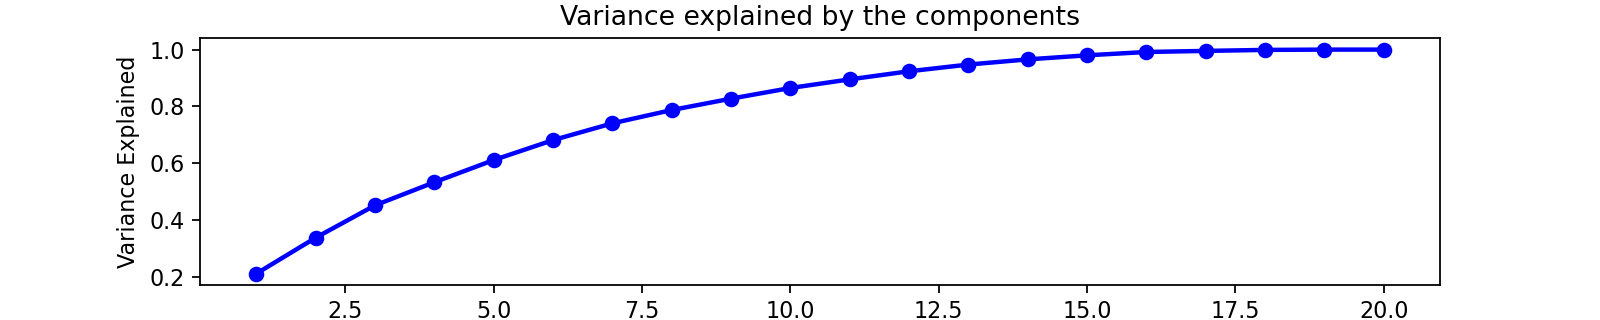

None


In [60]:
plt.figure(figsize = (10,2))
plt.plot(range(1,21), pca.explained_variance_ratio_.cumsum(), 'o-', linewidth=2, color='blue')
plt.title('Variance explained by the components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
print(plt.show())


We can see that there are 8 components needed to preserve 80 percent of the variance. We decide to set the number of principal component = 8. 

In [61]:
acapca = PCA(n_components=8)
acapca.fit(score_card_scaled3)
print("The principal components are:")
print(acapca.components_)
print("The explained variances are:")
print(acapca.explained_variance_)

The principal components are:
[[ 0.34784241  0.28746632  0.44281662 -0.20339381 -0.15702734  0.33510398
  -0.00320724  0.1200449   0.2483249   0.24999967 -0.28862845 -0.04708671
   0.16826225  0.01750352 -0.12636174  0.24536192 -0.11505153  0.10124458
   0.26377182  0.        ]
 [ 0.06525975  0.04873873  0.15649433 -0.06569238 -0.04532866  0.19695762
  -0.35476374  0.29618705 -0.3114737  -0.31569632 -0.03852271 -0.12524064
  -0.0161465   0.40446523  0.45665706  0.07930042  0.3178784   0.07674189
  -0.10327811  0.        ]
 [ 0.12934601  0.11733995  0.05880862 -0.02995474 -0.06353217  0.35205345
   0.27892079 -0.402      -0.37875819 -0.37765886 -0.22118951 -0.0204496
   0.11654522 -0.1601245  -0.06819266 -0.25535132 -0.17275478  0.22421759
  -0.27045246 -0.        ]
 [-0.08360164 -0.10129399  0.08136513 -0.00935699  0.01914486 -0.20645072
  -0.23266263  0.06407344 -0.21023454 -0.20700516  0.14435664 -0.32444322
   0.59297441 -0.00866117 -0.13976876 -0.17141891 -0.28775613 -0.04609201
  

After we got the principal components, we want to make a biplot to visualize each components. The code was refered from online learning website. 

In [62]:
def biplot(pcascore,coeff,pcax,pcay,labels=None):
    pca1=pcax-1
    pca2=pcay-1
    Xs = pcascore[:,pca1]
    Ys = pcascore[:,pca2]
    n=pcascore.shape[1]
    scalex = 1.0/(Xs.max()- Xs.min())
    scaley = 1.0/(Ys.max()- Ys.min())
    plt.scatter(Xs*scalex,Ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='black',alpha=0.5) 
        if labels is None:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='r', ha='center', va='center')
        else:
            plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(pcax))
    plt.ylabel("PC{}".format(pcay))
    fig2 = plt.grid()

    

<IPython.core.display.Javascript object>


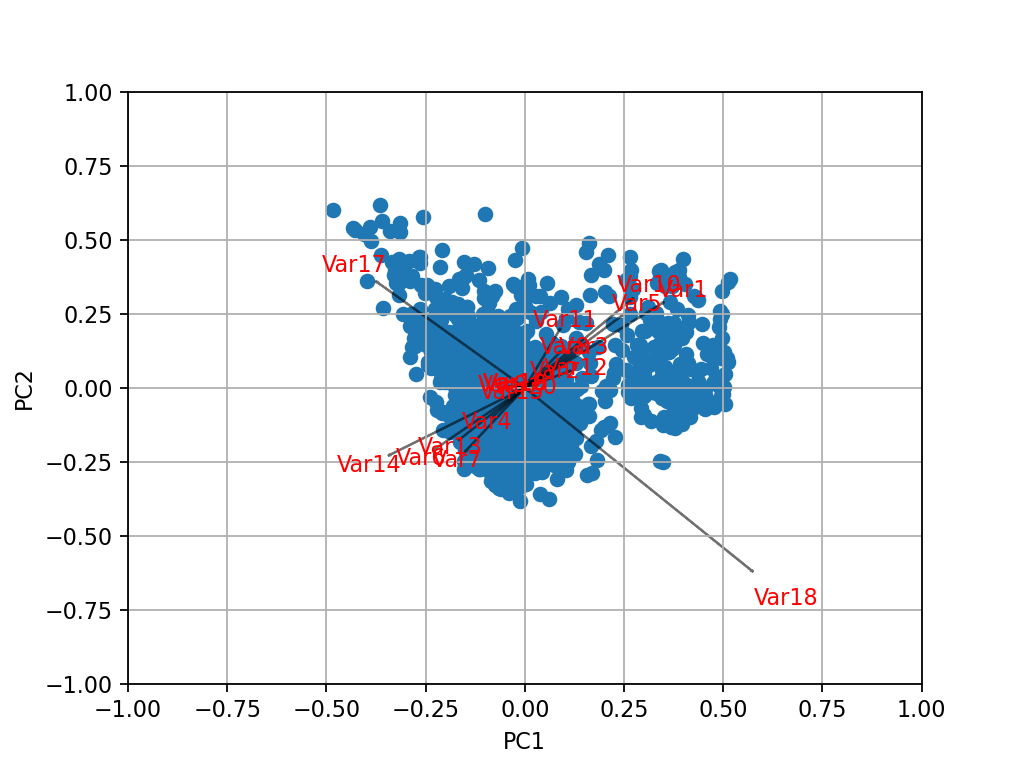

In [63]:
biplot(pca.transform(score_card_scaled3),pca.components_,1,2)

from the scree plot, we think the most appropriated number of components should be 4.

### PCA: Dimension Reduction

Now, we use pca to do the dimensio reduction.

<IPython.core.display.Javascript object>


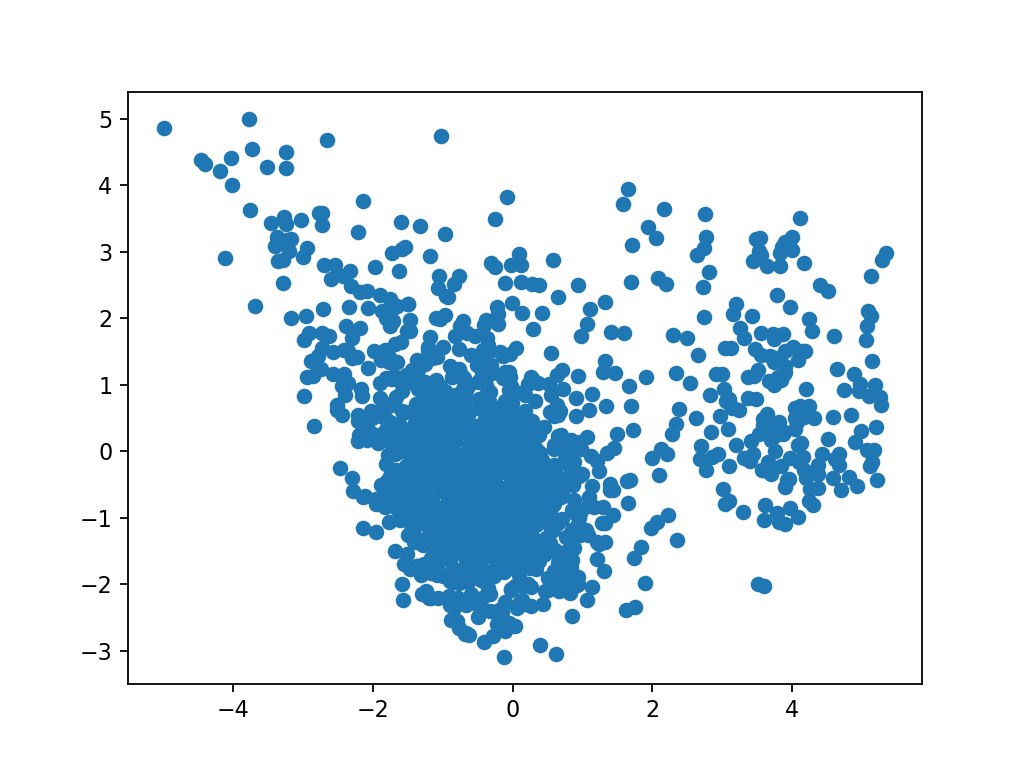

In [64]:
acadata_dr = acapca.transform(score_card_scaled3)
plt.scatter(acadata_dr[:,0], acadata_dr[:,1])

Now, we use sklearn (k-mean) to cluster the data. 

### K-mean cluster by PCA result

<IPython.core.display.Javascript object>


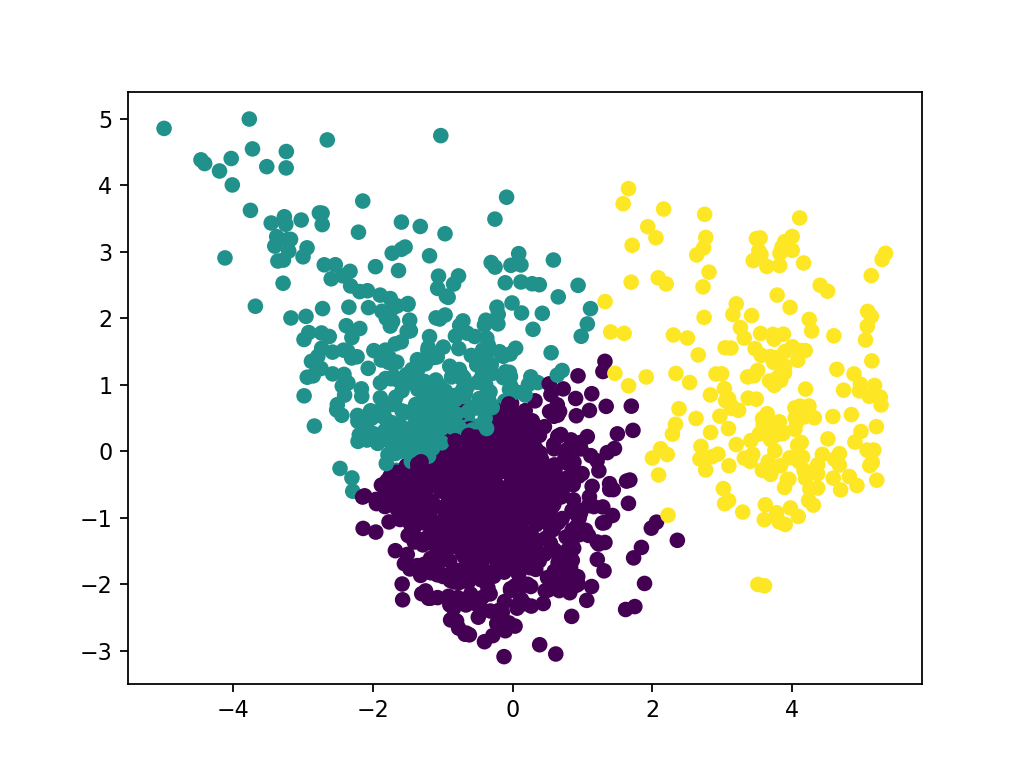

In [65]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(acadata_dr)
cluster_kmeans = kmeans.predict(acadata_dr)
plt.scatter(acadata_dr[:, 0], acadata_dr[:, 1], c=cluster_kmeans, cmap='viridis') # Use cluster_means as the indicator for clusters

These clusters show the main variances from the consideration of necessary components. The universities are colleges are divided into three clusters in a two-dimensional graph. When we consider a school, we can analyze according to the principal components, and fit the school into one of the clusters to help us to gain more insights on evaluation. From the variances after PCA, we can see the first two variances are higher than the rest, we also can say that the first two components could have more impact on variance than any pairs of others. The most influential components are shown in our biplot. However, 2D-dimension plots might not be the best fit if we consider the case when 8 components are considered. We include as many variables as we can to build the object model for underprivileged populations' decision making 